# TSF GRIP Task 1

## Project by Aadam Tayebji

### Prediction using supervised ML

Predict the percentage of a student based on the number of study hours using a simple linear regression that involves just two variables.

### Importing the dataset

In [1]:
dat<-read.csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [2]:
library(creditmodel)


Package 'creditmodel' version 1.3.0



### Viewing characteristics of the data and displaying the scatterplot

In [3]:
head(dat)

,Hours,Scores
,<dbl>,<int>
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20


In [4]:
dim(dat)

[1] 25  2

In [5]:
summary(dat)

     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

In [6]:
attach(dat)

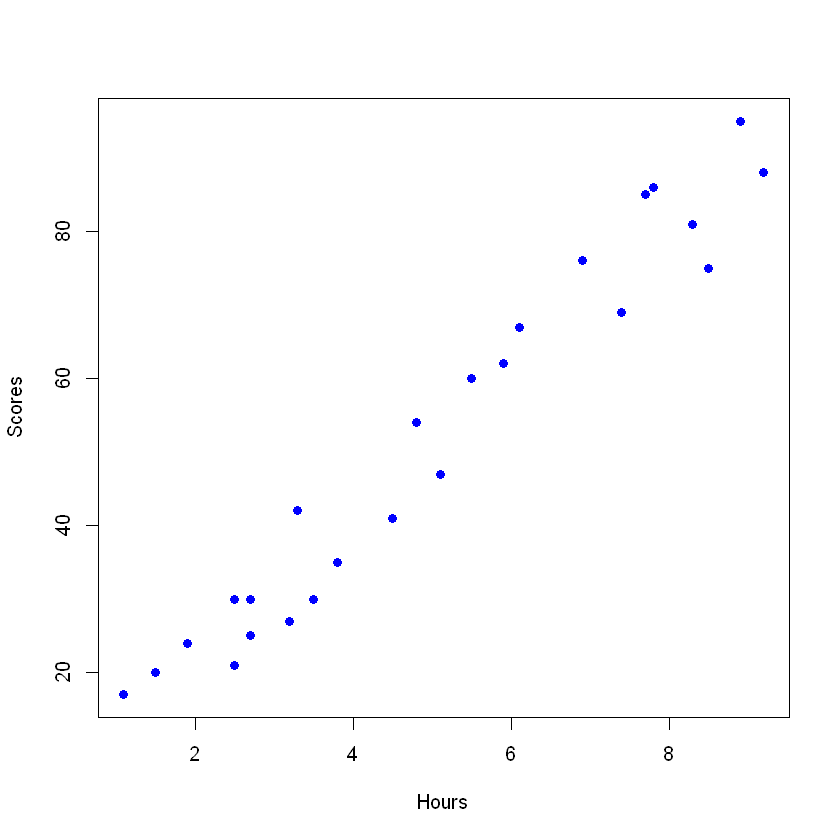

In [7]:
plot(Scores~Hours,pch=19,col="blue")

**It is evident that the two variables have a positive linear relation between them**

### Generating the Training and Testing dataset

In [8]:
dt = sort(sample(nrow(dat), nrow(dat)*.7))

In [9]:
train=dat[dt,]
train

,Hours,Scores
,<dbl>,<int>
1,2.5,21
2,5.1,47
3,3.2,27
5,3.5,30
8,5.5,60
9,8.3,81
10,2.7,25
11,7.7,85
13,4.5,41


In [10]:
test=dat[-dt,]
test

,Hours,Scores
,<dbl>,<int>
4,8.5,75
6,1.5,20
7,9.2,88
12,5.9,62
17,2.5,30
19,6.1,67
23,3.8,35
24,6.9,76


### Training the model Using the Training Set

In [11]:
Scores=data.frame(Scores)
Hours=data.frame(Hours)

In [12]:
y=(Scores[dt,])
x=(Hours[dt,])

In [13]:
fit=lm(y~x)

In [14]:
coeff=coefficients(fit)

In [15]:
eq = paste0("y = ", round(coeff[1], 3), "*x +", round(coeff[2], 3))

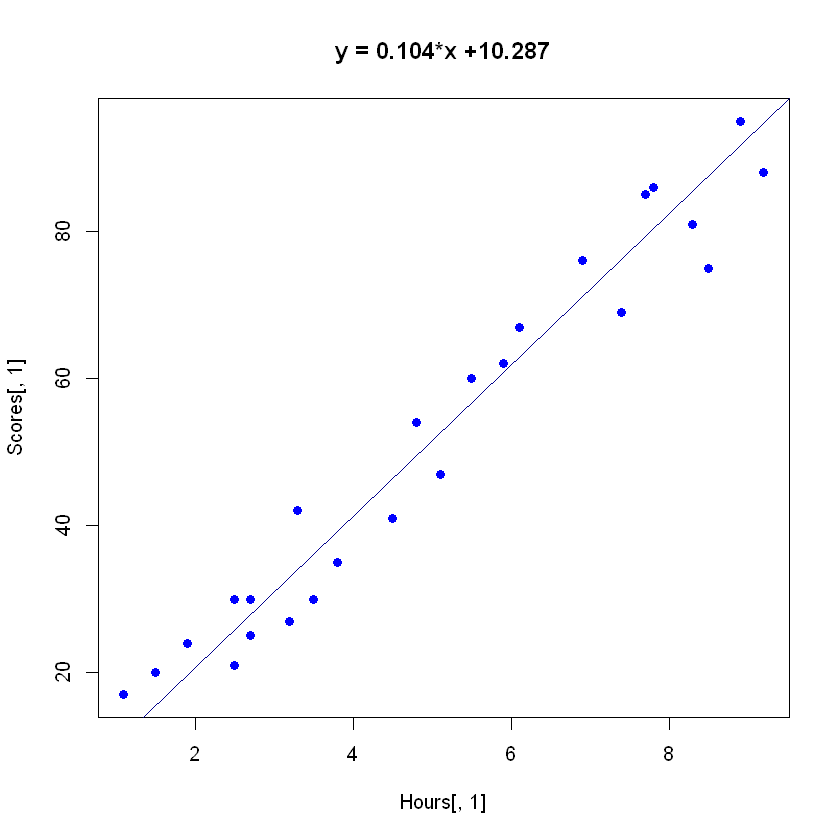

In [16]:
plot(Scores[,1]~Hours[,1],pch=19,col="blue",main=eq)
abline(coeff,col="darkblue")

**The above plot shows the regression line with respect to the datapoints.**

### Predicting Values using the Testing Set

In [17]:
x=(Hours[-dt,])

In [18]:
y_pred=predict.lm(fit,newdata=data.frame(x))

In [19]:
table=data.frame(Scores[-dt,],y_pred)

In [20]:
table

,Scores..dt...,y_pred
,<int>,<dbl>
1,75,87.54472
2,20,15.53495
3,88,94.74569
4,62,60.79823
5,30,25.82206
6,67,62.85565
7,35,39.19530
8,76,71.08534


In [21]:
pred=predict.lm(fit,newdata=data.frame(x=9.25))
pred

1 
95.26005

**According to the model generated, the predicted score is 92.195 if you study for 9.25 hours.**

### Evaluation of the Model

One of the many ways to evaluate the performance of the model is the Mean Absolute Error which is given below:

In [22]:
mean(abs(Scores[-dt,]-y_pred))

[1] 5.298685